## AUDIENCE ACTIVITY - A STUDY ON HOW THE TIME OF DAY AFFECTS POST ENGAGEMENT 

This project aims to determine what kind of posts are more popular and get more interaction; and what time of the day is the best time to post.

Data is from Hacker News

Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result.

#### DATASET DESCRIPTION
* id: The unique identifier from Hacker News for the post
* title: The title of the post
* url: The URL that the posts links to, if it the post has a URL
* num_points: The number of points the post acquired, calculated as the total * * number of upvotes minus the total number of downvotes
* num_comments: The number of comments that were made on the post
* author: The username of the person who submitted the post
* created_at: The date and time at which the post was submitted

In [79]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

### DATA EXPLORATION AND CLEANING

In [3]:
hn = pd.read_csv("hn_posts.csv")
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14


In [3]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293119 entries, 0 to 293118
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            293119 non-null  int64 
 1   title         293119 non-null  object
 2   url           279256 non-null  object
 3   num_points    293119 non-null  int64 
 4   num_comments  293119 non-null  int64 
 5   author        293119 non-null  object
 6   created_at    293119 non-null  object
dtypes: int64(3), object(4)
memory usage: 15.7+ MB


In [4]:
hn["author"].value_counts()

jonbaer       2731
ingve         2487
prostoalex    1656
dnetesn       1517
jseliger      1382
              ... 
cogmission       1
zhs              1
liady            1
poooogles        1
dionyziz         1
Name: author, Length: 51900, dtype: int64

Entries with empty url fields will be filled with "no url"

In [4]:
hn["url"] = hn["url"].fillna("no url")

In [6]:
hn["url"].isnull().sum()

0

In [7]:
hn["title"][:10]

0    You have two days to comment if you want stem ...
1                           SQLAR  the SQLite Archiver
2    What if we just printed a flatscreen televisio...
3                                    algorithmic music
4    How the Data Vault Enables the Next-Gen Data W...
5                        Saving the Hassle of Shopping
6    Macalifa  A new open-source music app for UWP ...
7    GitHub  theweavrs/Macalifa: A music player wri...
8                        Google Allo  first Impression
9        Advanced Multimedia on the Linux Command Line
Name: title, dtype: object

In [8]:
hn.describe()

,id,num_points,num_comments
count,2.931190e+05,293119.000000,293119.000000
mean,1.133046e+07,15.025324,6.525544
std,6.961055e+05,58.504103,30.376319
min,1.017690e+07,1.000000,0.000000
25%,1.071636e+07,1.000000,0.000000
50%,1.130303e+07,2.000000,0.000000
75%,1.193152e+07,4.000000,1.000000
max,1.257901e+07,5771.000000,2531.000000


In [5]:
# The "created_at" column is an object. It'll now be converted to datetime to 
hn["created_at"] = pd.to_datetime(hn["created_at"])

In [6]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293119 entries, 0 to 293118
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            293119 non-null  int64         
 1   title         293119 non-null  object        
 2   url           293119 non-null  object        
 3   num_points    293119 non-null  int64         
 4   num_comments  293119 non-null  int64         
 5   author        293119 non-null  object        
 6   created_at    293119 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 15.7+ MB


Now that the datetime column is created, i will now extract the most common hour of the day that received the most comments

In [7]:
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,2016-09-26 03:26:00
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,2016-09-26 03:24:00
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,2016-09-26 03:19:00
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,2016-09-26 03:16:00
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,2016-09-26 03:14:00


In [36]:
dt.strptime(hn["created_at"][0].str, "%Y-%m-%d %H:%M").hour

AttributeError: 'Timestamp' object has no attribute 'str'

In [18]:
hn[["created_at"]].describe()

,created_at
count,293119
unique,215563
top,2016-04-09 22:40:00
freq,11
first,2015-09-06 05:50:00
last,2016-09-26 03:26:00


In [26]:
hn[["created_at"]].describe().iloc[2][0].hour

22

Find out what time of the day receives the most comment

In [42]:
title = hn["title"]
ask_posts = []
show_posts = []
other_posts = []

In [43]:
for row in hn.index:
    if title.loc[row].lower().startswith("ask hn"):
        ask_posts.append(hn.loc[row])
    elif title.loc[row].lower().startswith("show hn"):
        show_posts.append(hn.loc[row])
    else:
        other_posts.append(hn.loc[row])

In [44]:
ask_df = pd.DataFrame(ask_posts)
show_df = pd.DataFrame(show_posts)
others_df = pd.DataFrame(other_posts)

In [67]:
def extract_hour(df, col):
    
    hour_created = [created_time.hour for created_time in df[col]]
    hour_created = [dt.strptime(str(i), "%H").strftime("%H") for i in hour_created]
    
    return hour_created

In [70]:
ask_df["created_hour"] = extract_hour(ask_df, "created_at")
show_df["created_hour"] = extract_hour(show_df, "created_at")
others_df["created_hour"] = extract_hour(others_df, "created_at")

In [137]:
ask_comments = ask_df["num_comments"].sum()
show_comments = show_df["num_comments"].sum()
others_comments = others_df["num_comments"].sum()
total_comments = hn["num_comments"].sum()

In [93]:
ask_df["num_comments"][ask_df["created_hour"] == "15"].sum()

18525

In [147]:
df = ask_df[["created_hour", "num_comments"]].groupby("created_hour").sum()
df.iloc[0]

num_comments    2277
Name: 00, dtype: int64

In [85]:
sns.set(style="whitegrid", rc={"figure.figsize":(15, 8)})

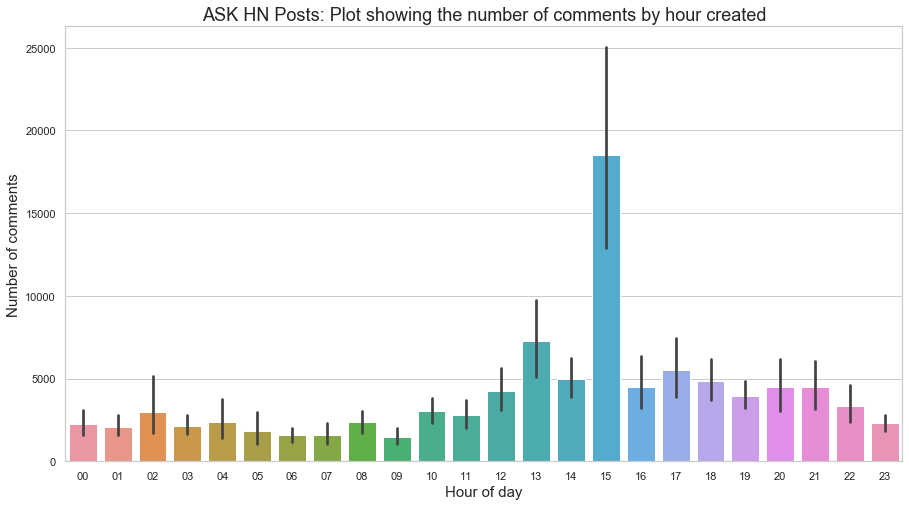

In [128]:
sns.barplot(x="created_hour", y="num_comments", data=ask_df,  orient="v", estimator=sum)

plt.title("ASK HN Posts: Plot showing the number of comments by hour created", fontsize=18)
plt.xlabel("Hour of day", fontsize=15)
plt.ylabel("Number of comments", fontsize=15);

In [138]:
print(f"Percentage of Ask HN posts: {(len(ask_df) / len(hn))*100}")
print(f"Percentage of Ask HN comments: {(ask_comments / total_comments) * 100}")
print(f"The time of day with the most comments: )

Percentage of Ask HN posts: 3.117846335447378
Percentage of Ask HN comments: 4.965910534562342


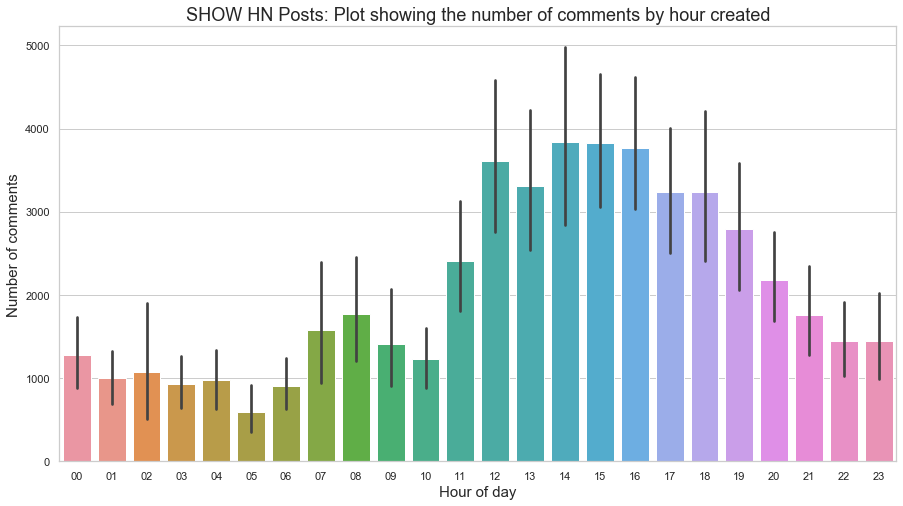

In [129]:
sns.barplot(x="created_hour", y="num_comments", data=show_df,  orient="v", estimator=sum)

plt.title("SHOW HN Posts: Plot showing the number of comments by hour created", fontsize=18)
plt.xlabel("Hour of day", fontsize=15)
plt.ylabel("Number of comments", fontsize=15);

In [149]:
print(f"Percentage of Show HN posts: {(len(show_df) / len(hn))*100}")
print(f"Percentage of Show HN comments: {(show_comments / total_comments) * 100}")
print(f"The time of day with the most comments: ")

Percentage of Show HN posts: 3.4654867135873144
Percentage of Show HN comments: 2.594835423767005
The time of day with the most comments: 


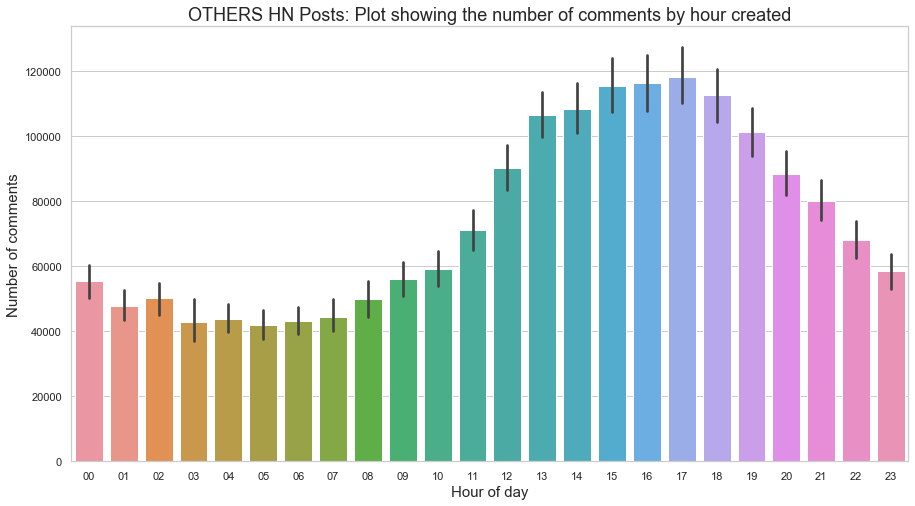

In [131]:
sns.barplot(x="created_hour", y="num_comments", data=others_df,  orient="v", estimator=sum)

plt.title("OTHERS HN Posts: Plot showing the number of comments by hour created", fontsize=18)
plt.xlabel("Hour of day", fontsize=15)
plt.ylabel("Number of comments", fontsize=15);

Peak time for posts is between 12:00 to 20:00 Eastern time.

Posts receive less activity in the early hours of the day.